## Tutorial 1: Reading and plotting a spectrum

We will start by reading and plotting a spectrum from the ESPRESSO spectrograph.

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 12

In [31]:
from actin2 import actin2

actin = actin2.ACTIN()
print(actin.__doc__)

The ACTIN class. Reads fits files and calculates activity indices.

    Attributes:
        ReadSpec (actin2.ReadSpec) : Object that reads spectrum and   
            headers.
        IndTable (actin2.IndTable) : Object containing the 
            indices table.
        ProcessSpec (actin2.ProcessSpec) : Object to process the 
            spectrum.
    


First we are going to use a fits file provided by `actin` in the ``test`` directory.

In [32]:
import os, glob
files = glob.glob(os.path.join(os.pardir, os.pardir, os.pardir, "actin2/test/HARPS/HD41248", "*_s1d_A.fits"))
files

['../../../actin2/test/HARPS/HD41248/HARPS.2014-01-24T01:18:06.472_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-16T06:24:23.418_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-24T04:17:29.213_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-21T05:33:32.740_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-21T03:16:16.891_s1d_A.fits',
 '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-16T05:37:46.157_s1d_A.fits']

Now we read the spectrum by calling the class `actin.ReadSpec` with the file name inside `files` the list. The class ``actin.ReadSpec`` can read one fits file and identify the spectrum to read it automatically.

In [33]:
read_spec = actin.ReadSpec(files[0])

The spectrum data is now stored in `read_spec.spec` which includes dictionaries with the spectrum and headers. The `spec` object is a reference to the spectrograph class used to read the file, in this case ESPRESSO. All methods of the `ESPRESSO` class will be available in `spec`.

In [34]:
print(read_spec.spec)

In [35]:
print(dir(read_spec.spec))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_deblaze', '_get_snr', '_get_target', '_save_object_data', '_search_file', 'ccf_profile', 'headers', 'spectrum']


The `spectrum`, `headers` and `ccf_profile` methods are dictionaries.

In [36]:
print(read_spec.spec.spectrum.keys())
spec = read_spec.spec.spectrum
print(spec['wave'][0])
print(spec['wave_raw'][0])

dict_keys(['wave_raw', 'wave', 'flux_err', 'flux'])
3781.505531211812
3781.55


In [37]:
read_spec.spec.headers

{'obj': 'HD41248',
 'instr': 'HARPS',
 'date_obs': '2014-01-24T01:18:06.471',
 'bjd': 2456681.5586334,
 'snr_med': 55.0,
 'ftype': 's1d',
 'rv': 3525.3817390101003,
 'rv_err': 1.07284148378742,
 'berv': -2906.50537382529,
 'ccf_noise': 1.61618716144072,
 'fwhm': 6747.20227395774,
 'cont': 39.2040895675395,
 'noise': 6.527054441852976,
 'spec_flg': 'OK',
 'file': 'HARPS.2014-01-24T01:18:06.472_s1d_A.fits'}

To see the spectrum we can call the `plot` method to plot the full spectrum. If the file was a 2D spectrum, we could have used the `order` option in the `plot` method to select the order to plot. The option ```show=False``` can be used to produce the plot without calling `plt.show()` so the plot can be used afterwards.

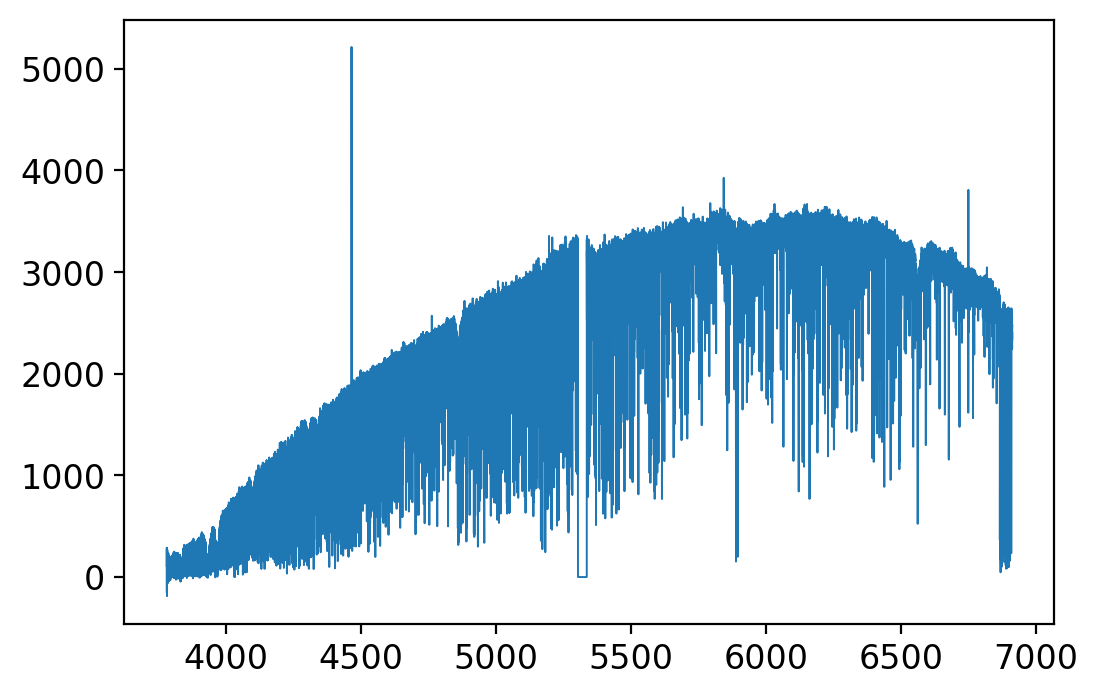

In [41]:
read_spec.plot(order=66, show=True, lw=0.7)

The `plot` method accepts keywords used in `matplotlib.pylab.plot` so the plot parameters can be changed easily.

We can compare the spectrum at the star's rest frame (the one plotted above) with the unshifted spectrum in the zone of the H$\alpha$ line:

(0.0, 3000.0)

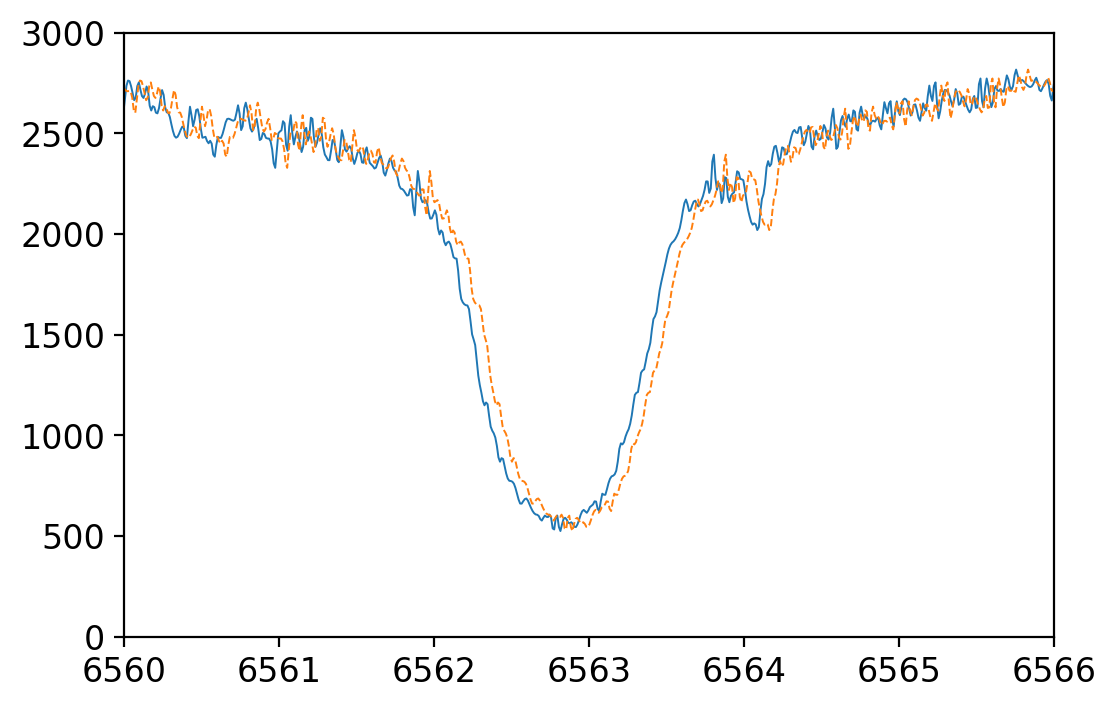

In [39]:
read_spec.plot(order=6, key_wave='wave', key_flux='flux', show=False, lw=0.7)
read_spec.plot(order=6, key_wave='wave_raw', key_flux='flux', ls='--', lw=0.7, show=False)
plt.xlim(6560, 6566)
plt.ylim(0, 3000)

We can also check the cross-correlation function (CCF) profile:

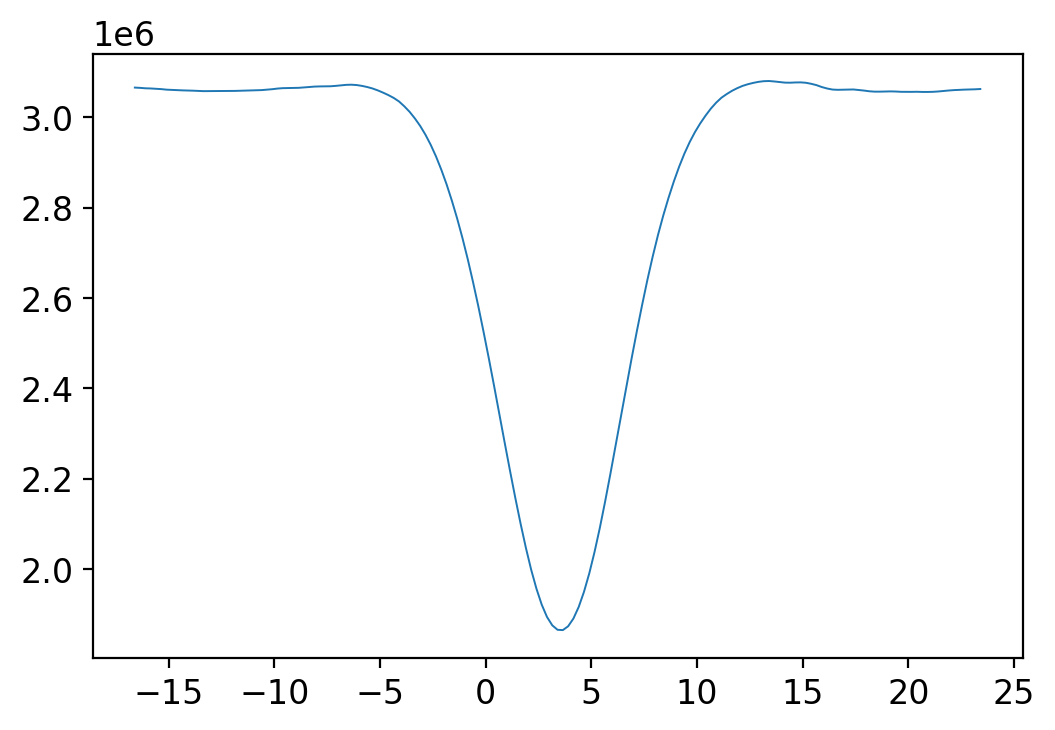

In [43]:
read_spec.plot_ccf(lw=0.7)